In [19]:
import numpy as np
import pandas as pd 
from tensorflow import keras
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [20]:
df = pd.read_csv("dataset/train.csv") 
df.image_id = df.image_id+".jpg"
df


,image_id,breed
0,a8b3ad1dde.jpg,nerodia-erythrogaster
1,8b492b973d.jpg,pantherophis-vulpinus
2,929b99ea92.jpg,thamnophis-sirtalis
3,bbac7385e2.jpg,pantherophis-obsoletus
4,ef776b1488.jpg,agkistrodon-contortrix
...,...,...
5503,5f0c970adf.jpg,lampropeltis-triangulum
5504,f6a4287fac.jpg,pantherophis-alleghaniensis
5505,d3c10e63e1.jpg,thamnophis-sirtalis
5506,61ef50879c.jpg,pituophis-catenifer


thamnophis-sirtalis            509
storeria-dekayi                412
pantherophis-obsoletus         366
crotalus-atrox                 354
pituophis-catenifer            298
nerodia-sipedon                259
agkistrodon-contortrix         206
lampropeltis-triangulum        197
diadophis-punctatus            184
pantherophis-alleghaniensis    172
nerodia-erythrogaster          171
lampropeltis-californiae       166
opheodrys-aestivus             152
agkistrodon-piscivorus         147
crotalus-horridus              142
coluber-constrictor            129
heterodon-platirhinos          118
thamnophis-proximus            112
nerodia-rhombifer              104
pantherophis-guttatus          100
thamnophis-radix               100
haldea-striatula                98
pantherophis-spiloides          92
rhinocheilus-lecontei           91
storeria-occipitomaculata       87
masticophis-flagellum           83
crotalus-viridis                83
thamnophis-marcianus            82
crotalus-ruber      

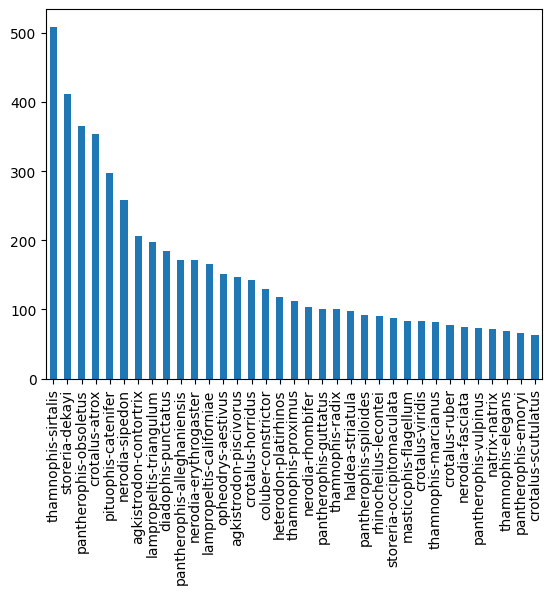

In [21]:
#total images and in each category

df['breed'].value_counts().plot.bar()
print(df['breed'].value_counts())

print("\n Total images: ", df.shape[0])

Sample Snake:

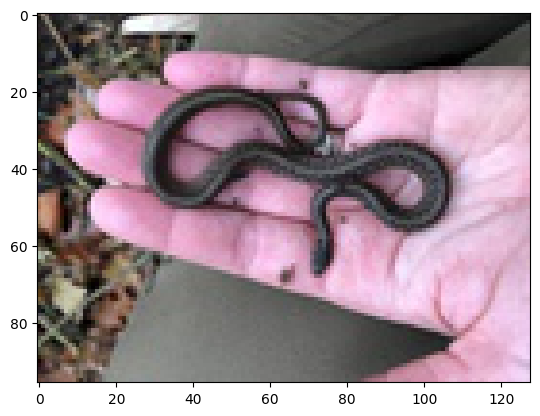

In [22]:
sample = df.sample().image_id.to_string(index=False)
image = load_img('dataset/train/'+sample)
plt.imshow(image)

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150,150, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
    
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
    
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(256, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
    
model2.add(Dense(256, activation='relu'))

model2.add(Dense(35, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_5 (Batc  (None, 148, 148, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_6 (Batc  (None, 72, 72, 32)       128       
 hNormalization)                                                 
                                                      

In [24]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.1, 
                                            min_lr=0.00001) 
callbacks = [earlystop, learning_rate_reduction]

In [25]:
df["breed"].head()

0     nerodia-erythrogaster
1     pantherophis-vulpinus
2       thamnophis-sirtalis
3    pantherophis-obsoletus
4    agkistrodon-contortrix
Name: breed, dtype: object

# Splitting files into testing and validation

thamnophis-sirtalis            409
storeria-dekayi                330
pantherophis-obsoletus         296
crotalus-atrox                 286
pituophis-catenifer            237
nerodia-sipedon                208
agkistrodon-contortrix         166
lampropeltis-triangulum        155
nerodia-erythrogaster          145
diadophis-punctatus            135
pantherophis-alleghaniensis    134
lampropeltis-californiae       127
opheodrys-aestivus             123
crotalus-horridus              118
agkistrodon-piscivorus         111
coluber-constrictor            102
heterodon-platirhinos          100
thamnophis-proximus             92
haldea-striatula                83
pantherophis-guttatus           80
nerodia-rhombifer               78
pantherophis-spiloides          78
thamnophis-radix                77
rhinocheilus-lecontei           73
storeria-occipitomaculata       68
thamnophis-marcianus            67
masticophis-flagellum           66
crotalus-viridis                66
nerodia-fasciata    

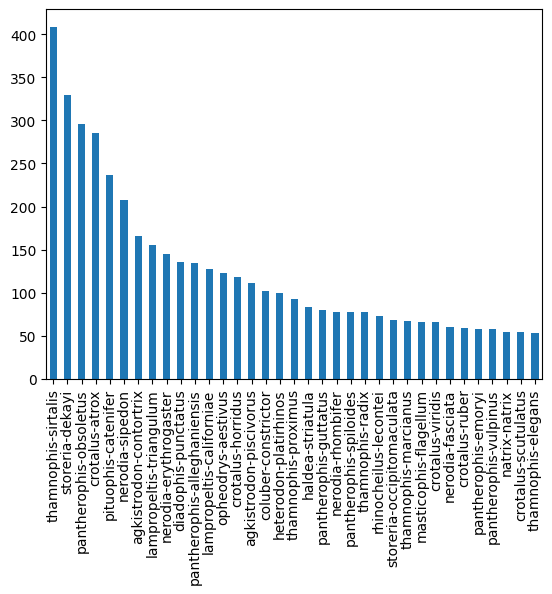

In [26]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=0) 

# Lets see total 'TRAIN' files and in each category
train_df = train_df.reset_index(drop=True)

train_df['breed'].value_counts().plot.bar()
print(train_df['breed'].value_counts())
print("\n Total train images: ", train_df.shape[0])

thamnophis-sirtalis            100
storeria-dekayi                 82
pantherophis-obsoletus          70
crotalus-atrox                  68
pituophis-catenifer             61
nerodia-sipedon                 51
diadophis-punctatus             49
lampropeltis-triangulum         42
agkistrodon-contortrix          40
lampropeltis-californiae        39
pantherophis-alleghaniensis     38
agkistrodon-piscivorus          36
opheodrys-aestivus              29
coluber-constrictor             27
nerodia-erythrogaster           26
nerodia-rhombifer               26
crotalus-horridus               24
thamnophis-radix                23
thamnophis-proximus             20
pantherophis-guttatus           20
storeria-occipitomaculata       19
heterodon-platirhinos           18
rhinocheilus-lecontei           18
crotalus-ruber                  18
natrix-natrix                   18
crotalus-viridis                17
masticophis-flagellum           17
thamnophis-elegans              16
pantherophis-vulpinu

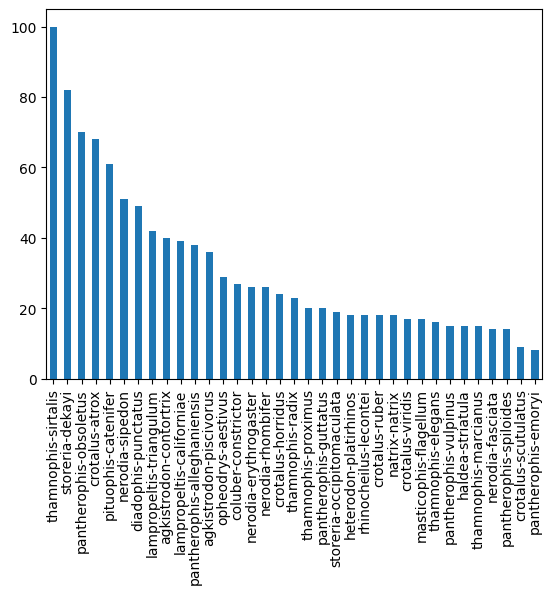

In [27]:
# Lets see total 'VALIDATE' files and in each category

validate_df = validate_df.reset_index(drop=True)
validate_df['breed'].value_counts().plot.bar()

print(validate_df['breed'].value_counts())
print("\n Total validate images: ", validate_df.shape[0])

In [28]:
# Get total train and validate, and batch size to fit model

total_train = train_df.shape[0]
print("Total train images:", total_train)

total_validate = validate_df.shape[0] 
print("Total validate images:", total_validate)

Total train images: 4406
Total validate images: 1102


# Data Augmentation 

In [29]:
train_datagen = ImageDataGenerator(
                                    rotation_range=15,
                                    rescale=1./255,
                                    shear_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "dataset/train/", 
    x_col='image_id',
    y_col='breed',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "dataset/train/", 
    x_col='image_id',
    y_col='breed',
    target_size=(150,150),
    class_mode='categorical',
    batch_size=32
)

Found 4406 validated image filenames belonging to 35 classes.
Found 1102 validated image filenames belonging to 35 classes.


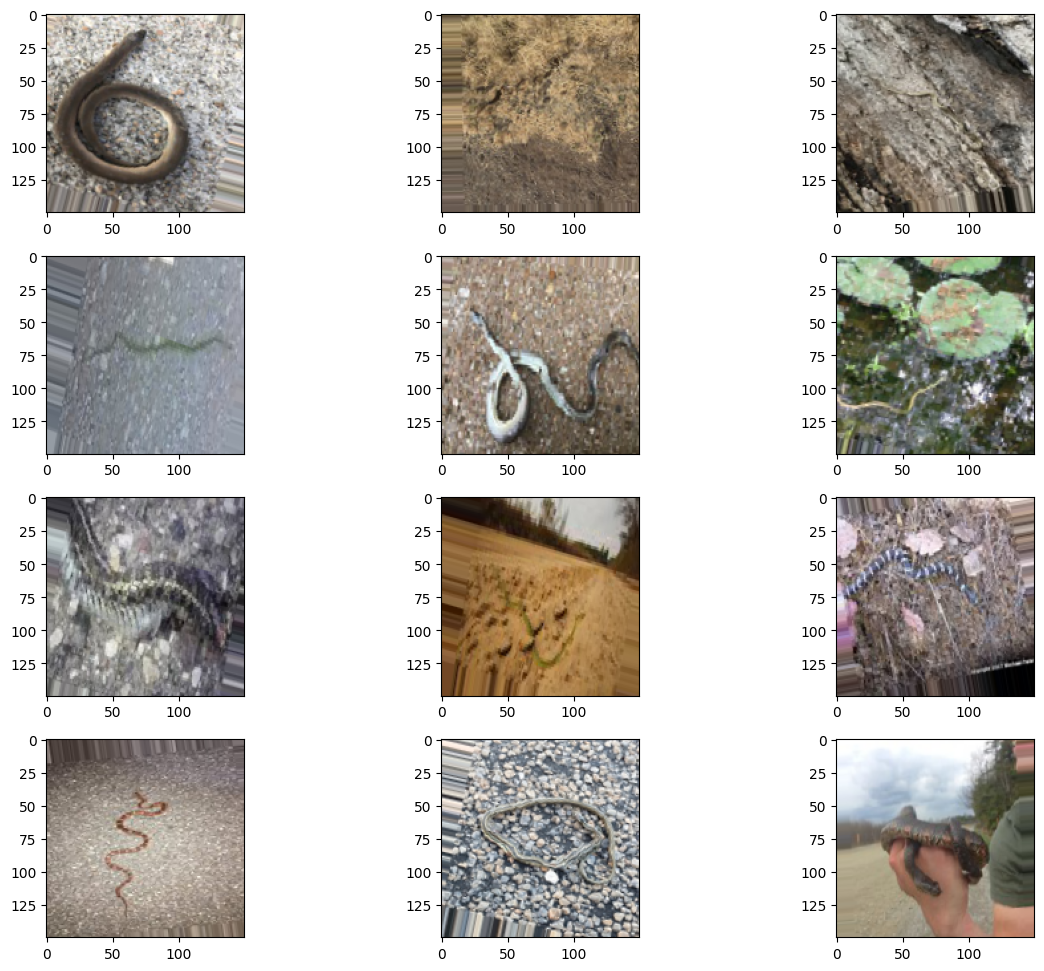

In [30]:
# Lets take a look at how augmented images from train generator look like

plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Train the model

In [31]:
epochs=65
batch_size=35

history = model2.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate/batch_size,
    steps_per_epoch=total_train/batch_size,
    callbacks=callbacks
)

Epoch 1/65


/var/folders/76/sww56c6525l0xlj569nqkpw80000gn/T/ipykernel_56204/190569385.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model2.fit_generator(


125/125 [==============================] - 44s 342ms/step - loss: 3.6500 - accuracy: 0.0885 - val_loss: 3.9354 - val_accuracy: 0.0332 - lr: 0.0010
Epoch 2/65
125/125 [==============================] - 44s 346ms/step - loss: 3.4030 - accuracy: 0.1032 - val_loss: 3.7468 - val_accuracy: 0.0605 - lr: 0.0010
Epoch 3/65
125/125 [==============================] - 47s 376ms/step - loss: 3.3423 - accuracy: 0.1079 - val_loss: 3.7939 - val_accuracy: 0.0791 - lr: 0.0010
Epoch 4/65
125/125 [==============================] - 47s 369ms/step - loss: 3.2780 - accuracy: 0.1290 - val_loss: 3.3782 - val_accuracy: 0.0918 - lr: 0.0010
Epoch 5/65
125/125 [==============================] - 47s 371ms/step - loss: 3.2347 - accuracy: 0.1377 - val_loss: 3.3163 - val_accuracy: 0.1299 - lr: 0.0010
Epoch 6/65
125/125 [==============================] - 48s 381ms/step - loss: 3.1988 - accuracy: 0.1386 - val_loss: 3.4061 - val_accuracy: 0.1006 - lr: 0.0010
Epoch 7/65
125/125 [==============================] - 48s 381ms

# Graphing Training and Validation

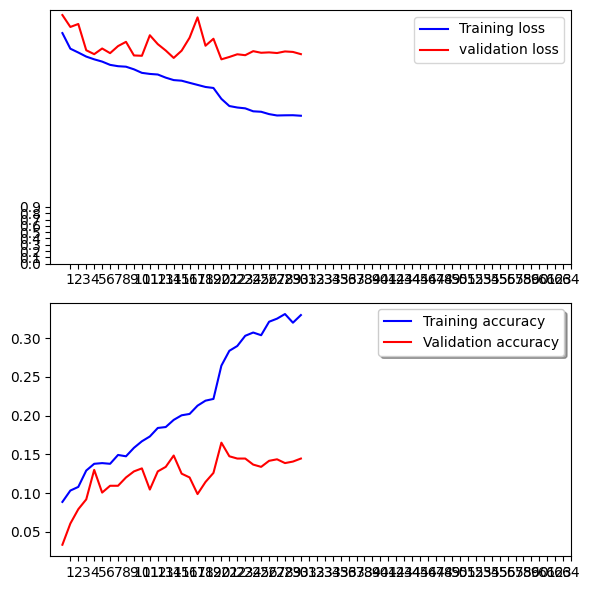

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,6))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [33]:
model2.save('snakes.hdf5')

#"""
from keras import models   
model = models.load_model('snakes.hdf5', compile = False)
#"""

# Testing

In [34]:
test_df = pd.read_csv("dataset/test.csv") 
test_df.image_id = test_df.image_id+".jpg"
test_df

,image_id
0,7ede553357.jpg
1,3500b219e4.jpg
2,d43a78d6d9.jpg
3,1f36f26994.jpg
4,8cb85fc58e.jpg
...,...
2356,93e591cb23.jpg
2357,68a603b39d.jpg
2358,4f472510f3.jpg
2359,d6884444ae.jpg


Check total images in test folder

In [35]:
total_test = test_df.shape[0]  
print("Total amount of test images are:", total_test)

Total amount of test images are: 2361


In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 15

test_generator = test_datagen.flow_from_dataframe(
    test_df, 
    "dataset/test/",
    x_col='image_id',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=batch_size,
    shuffle=False 
)

Found 2361 validated image filenames.


In [37]:
predict = model.predict_generator(test_generator, steps=np.ceil(total_test/batch_size))

# Get total predicteed images       

print("Number of predicted images:", len(predict), "\n")

# Get predictions in array
# These are labels 0, 1, 2 (category)
# Use [?:?] to specify range of index in list/array


/var/folders/76/sww56c6525l0xlj569nqkpw80000gn/T/ipykernel_56204/1047615721.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(total_test/batch_size))


Number of predicted images: 2361 



In [38]:
test_df['breed'] = np.argmax(predict, axis=-1) 

# Lets see the some predicted values for each category of images
# Use [?:?] to specify range 

print(test_df['breed'][0:3]) 

0    34
1    34
2    26
Name: breed, dtype: int64


In [39]:
print(train_generator.class_indices) 
print(validation_generator.class_indices, "\n")

# Map labels 
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['breed'] = test_df['breed'].replace(label_map)
print(label_map, "\n")

# See the output of mapped labels
print(test_df['breed'][0:4], "\n")

# Lets replace letters with words to see better
print(test_df['breed'][0:3])

{'agkistrodon-contortrix': 0, 'agkistrodon-piscivorus': 1, 'coluber-constrictor': 2, 'crotalus-atrox': 3, 'crotalus-horridus': 4, 'crotalus-ruber': 5, 'crotalus-scutulatus': 6, 'crotalus-viridis': 7, 'diadophis-punctatus': 8, 'haldea-striatula': 9, 'heterodon-platirhinos': 10, 'lampropeltis-californiae': 11, 'lampropeltis-triangulum': 12, 'masticophis-flagellum': 13, 'natrix-natrix': 14, 'nerodia-erythrogaster': 15, 'nerodia-fasciata': 16, 'nerodia-rhombifer': 17, 'nerodia-sipedon': 18, 'opheodrys-aestivus': 19, 'pantherophis-alleghaniensis': 20, 'pantherophis-emoryi': 21, 'pantherophis-guttatus': 22, 'pantherophis-obsoletus': 23, 'pantherophis-spiloides': 24, 'pantherophis-vulpinus': 25, 'pituophis-catenifer': 26, 'rhinocheilus-lecontei': 27, 'storeria-dekayi': 28, 'storeria-occipitomaculata': 29, 'thamnophis-elegans': 30, 'thamnophis-marcianus': 31, 'thamnophis-proximus': 32, 'thamnophis-radix': 33, 'thamnophis-sirtalis': 34}
{'agkistrodon-contortrix': 0, 'agkistrodon-piscivorus': 1,

# View results

thamnophis-sirtalis            573
crotalus-atrox                 259
storeria-dekayi                233
pituophis-catenifer            196
pantherophis-obsoletus         154
lampropeltis-californiae       136
lampropeltis-triangulum         87
opheodrys-aestivus              82
nerodia-sipedon                 75
rhinocheilus-lecontei           55
pantherophis-guttatus           54
thamnophis-radix                53
agkistrodon-contortrix          50
pantherophis-alleghaniensis     47
crotalus-horridus               44
agkistrodon-piscivorus          28
thamnophis-marcianus            27
thamnophis-proximus             24
diadophis-punctatus             24
coluber-constrictor             20
crotalus-scutulatus             19
nerodia-erythrogaster           19
heterodon-platirhinos           17
haldea-striatula                15
nerodia-rhombifer               12
pantherophis-emoryi             11
pantherophis-spiloides           8
crotalus-viridis                 7
masticophis-flagellu

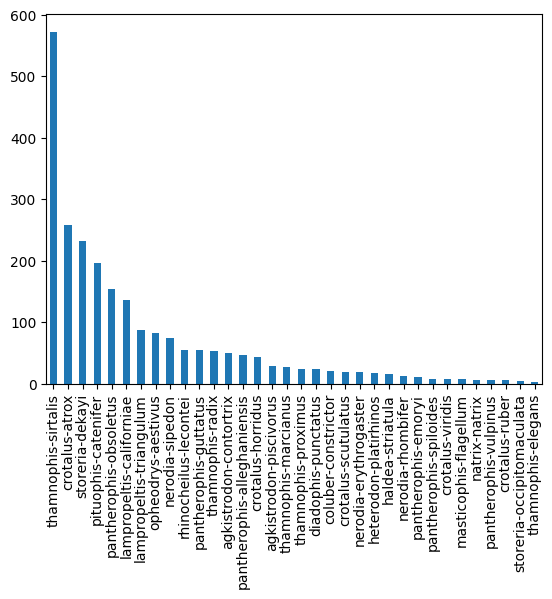

In [40]:
test_df['breed'].value_counts()
print(test_df['breed'].value_counts())

# View the above in a bar graph
test_df['breed'].value_counts().plot.bar()

# Lets print the total predicted images 
print("\nTotal predicted images:", test_df.shape[0])

In [41]:
venomous = ["agkistrodon-contortrix", "agkistrodon-piscivorus", "crotalus-atrox",
            "crotalus-horridus","crotalus-ruber", "crotalus-scutulatus","crotalus-viridis",
            "heterodon-platirhinos","thamnophis-radix","thamnophis-marcianus"]

nonvenomous = ["coluber-constrictor","diadophis-punctatus","haldea-striatula",
              "lampropeltis-californiae","lampropeltis-triangulum","masticophis-flagellum",
              "natrix-natrix","nerodia-erythrogaster","nerodia-fasciata","nerodia-rhombifer",
              "nerodia-sipedon","opheodrys-aestivus","pantherophis-alleghaniensis",
              "pantherophis-emoryi","pantherophis-guttatus","pantherophis-obsoletus",
              "pantherophis-spiloides","pantherophis-vulpinus","pituophis-catenifer",
              "rhinocheilus-lecontei","storeria-dekayi", "storeria-occipitomaculata",
              "thamnophis-elegans","thamnophis-proximus","thamnophis-sirtalis"] 

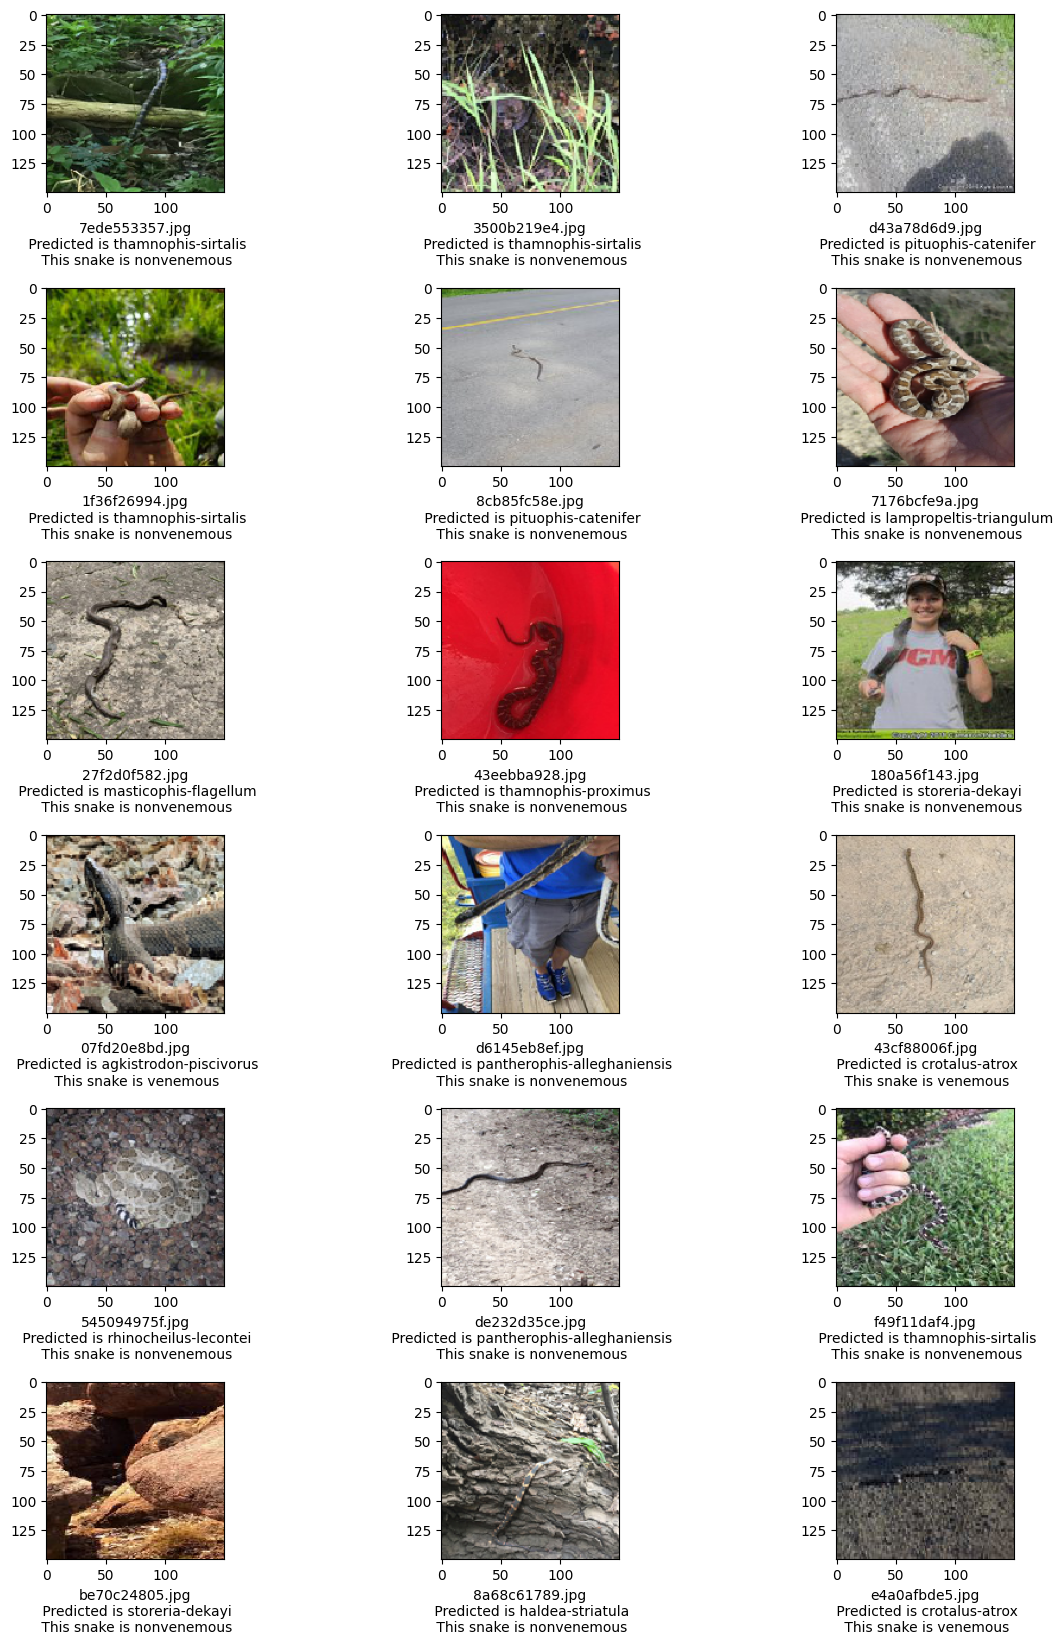

In [43]:
test_df.insert(2, "snake_type", " ")
for ind in test_df.index:
    breed = test_df['breed'][ind]
    if breed in venomous:
        test_df["snake_type"][ind] = "venemous"
    else:
        test_df["snake_type"][ind] = "nonvenemous"
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows(): 
    filename = row['image_id']
    category = row['breed']
    snake_type = row['snake_type']
    img = load_img("dataset/test/"+filename, target_size=(150,150)) #rescale(1./255)
    plt.subplot(9, 3, index+1)      
    plt.imshow(img)
    plt.xlabel(filename + "\n Predicted is " + "{}".format(category) + "\n This snake is " + snake_type)
plt.tight_layout()
plt.show()

# Save

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['image_id'].str.split('.').str[0]
submission_df['label'] = submission_df['breed']
submission_df.drop(['image_id', 'breed'], axis=1, inplace=True)
submission_df.to_csv('snakes.csv', index=False)

submission_df.head(300)